In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')

In [2]:
def return_ghg(scenario, scope='D'):
    ghg = pd.read_excel(f'./../scenarios/data-out/{scenario}/E{scope}.xlsx')
    ghg = ghg[ghg['EmissionID'] == 1]
    return ghg

In [3]:
def return_technology():
    technology = pd.read_csv(f'./../data/technology.csv')
    return technology

In [4]:
technology = return_technology()

In [5]:
scenarios = ['OMOKA', 'ELECTRICDREAMS', 'KUJINAO', 'STREETFIGHTING']

In [6]:
ghg_dfs = {}
for scenario in scenarios:
    print(scenario)
    ghg_dfs[scenario] = return_ghg(scenario)

OMOKA
ELECTRICDREAMS
KUJINAO
STREETFIGHTING


In [7]:
import pickle

f = open(f'ghg_dfs.pckl', 'wb')
pickle.dump(ghg_dfs, f)
f.close()

# f = open(f'ghg_dfs.pckl', 'rb')
# ghg_dfs = pickle.load(f)
# f.close()

In [8]:
# define vehtype and fuel groupings 
vehtype_groupings = {'Moto': [2], 'Car': [3], 'Bus/Matatu': [4], 'Truck': [5], 'Train': [6], 'Ship': [7], 'Aeroplane': [8]}

# dictionary to group fuels, but this time by ID
fuel_groupings = {'Petrol': [1,3], 'Battery Electric': [12], 'Diesel': [2,4], 'Biofuels/Mixes': [6, 7, 8, 11], 'Hydrogen': [13, 14], 'Jet Fuel': [15], 'CNG/LPG':[5, 10]}

# labels for stacked bar chart
labels = ('Baseline 2015',
 'Omoka 2030',
 'Omoka 2040',
 'Omoka 2050',
 'Electric Dreams 2030',
 'Electric Dreams 2040',
 'Electric Dreams 2050',
 'Kujinao 2030',
 'Kujinao 2040',
 'Kujinao 2050',
 'Streetfighting 2030',
 'Streetfighting 2040',
 'Streetfighting 2050')

In [9]:
# stacked bar chart!
# group chart data by fuel
chart_data = {}

comparison_years = [2012, 2030, 2040, 2050]

for vehtype in vehtype_groupings:
    
    for fuel in fuel_groupings:
        
        data_list = []
        
        for scenario in scenarios:
            
            ghg = ghg_dfs[scenario]
            
            for year in comparison_years:
                
                if year == 2012:
                    if scenario.lower() == 'omoka':
        
                        # append the sum of emissions
                        data_list.append(ghg[(ghg['Year'] == year) & (ghg['TechID'].isin(technology[technology['VehTypeID'].isin(vehtype_groupings[vehtype])]['TechID'])) & (ghg['TechID'].isin(technology[technology['FuelID'].isin(fuel_groupings[fuel])]['TechID']))]['ED_Value'].sum() * 1e-6) # MtCO2
    
                else:
                    data_list.append(ghg[(ghg['Year'] == year) & (ghg['TechID'].isin(technology[technology['VehTypeID'].isin(vehtype_groupings[vehtype])]['TechID'])) & (ghg['TechID'].isin(technology[technology['FuelID'].isin(fuel_groupings[fuel])]['TechID']))]['ED_Value'].sum() * 1e-6) # MtCO2
                    
        chart_data[f'{vehtype}, {fuel}'] = data_list

In [10]:
chart_data

{'Moto, Petrol': [0.8688653900451659,
  0.7577081927490235,
  0.055087618388235615,
  0.00749885345458984,
  0.5746746718139648,
  0.011656461731851099,
  0.0014159485416412358,
  0.7963077044372558,
  0.09899562840406223,
  0.02946360253906255,
  1.4209784700317387,
  0.6547800002477765,
  0.4929775297851563],
 'Moto, Battery Electric': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'Moto, Diesel': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'Moto, Biofuels/Mixes': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'Moto, Hydrogen': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'Moto, Jet Fuel': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'Moto, CNG/LPG': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'Car, Petrol': 

In [11]:
# colour by vehicle type, hash by fuel type
clr_palette = sns.color_palette('colorblind')
clrs = {}
cnt=0
for vehtype in vehtype_groupings:
    clrs[vehtype] = clr_palette[cnt]
    cnt+=1
    
cnt=0
hatches = ['oo', 'xx', '++', '-', '||', '//', '\\\\']
htchs = {}
for fuel in fuel_groupings:
    htchs[fuel] = hatches[cnt]
    cnt+=1

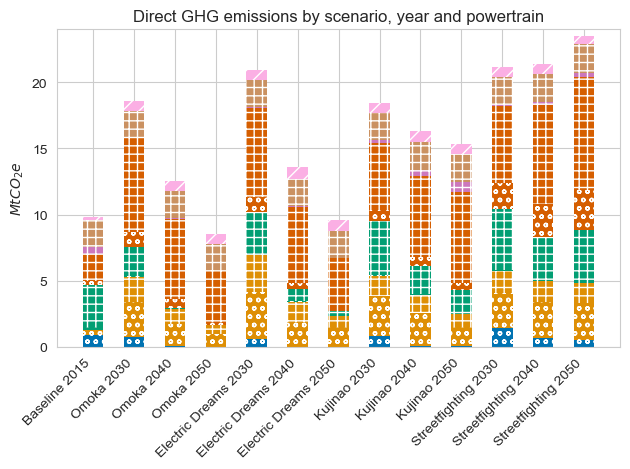

In [13]:
fig, ax = plt.subplots()

bottom = np.zeros(len(labels))

width = 0.5

for cat in chart_data:
    p = ax.bar(labels, chart_data[cat], width, label=cat, bottom=bottom, color= clrs[cat.split(',')[0]], hatch=htchs[cat.split(',')[1][1:]], linewidth=0)
    bottom += chart_data[cat]
    
fig.autofmt_xdate(rotation=45)

ax.set_title('Direct GHG emissions by scenario, year and powertrain')
# ax.legend(loc="upper right")
ax.set_ylim(top=24)

ax.set_ylabel('$MtCO_{2}e$')

fig.tight_layout()

plt.savefig('ghg-emissions-from-model-data.pdf')

In [18]:
# peak emissions!
peak_ghg = {}
for scenario in scenarios:
    ghg = ghg_dfs[scenario]
    val = 0
    y = 0
    for year in range(2023,2051):
        val1 = ghg[ghg.Year == year]['ED_Value'].sum()
        if val1 > val:
            y = year
            val = val1
    peak_ghg[scenario] = (y, val)
    

In [19]:
peak_ghg

{'OMOKA': (2024, 19692940.022124324),
 'ELECTRICDREAMS': (2027, 21520490.80965524),
 'KUJINAO': (2024, 19819877.928449504),
 'STREETFIGHTING': (2050, 23491627.744455352)}

In [17]:
# export chart data to csv for report
chart_df = pd.DataFrame(chart_data)
chart_df['Label'] = labels
chart_df = chart_df[['Label']+[c for c in chart_df.columns if c != 'Label']]
chart_df.to_csv('./csv/ghg-emissions.csv', index=False)